<a href="https://colab.research.google.com/github/pranavpathak08/House_Rent_Analysis/blob/main/House_rent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
data.shape

(4746, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### Checking for null values

In [5]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

No null value found

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


 Changing `floor` to numerical datatype

In [7]:
data['Floor'] = data['Floor'].apply(lambda x:str(x).split()[0])
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,Ground,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [8]:
data['Floor'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper', '11',
       'Lower', '6', '14', '43', '13', '18', '17', '9', '19', '60', '34',
       '12', '26', '25', '53', '16', '10', '39', '32', '47', '28', '20',
       '15', '65', '40', '37', '22', '21', '30', '35', '33', '44', '41',
       '46', '27', '45', '48', '50', '24', '23', '29', '49', '36', '76'],
      dtype=object)

replacing lower with -2, upper with -1 and ground with 0

In [9]:
data['Floor'].replace({'Ground' : 0,
                       'Upper' : -1,
                       'Lower' : -2}, inplace=True)
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,18-05-2022,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,13-05-2022,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,16-05-2022,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,04-07-2022,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,09-05-2022,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Dropping `Posted On` column

In [10]:
data = data.drop('Posted On', axis=1)
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Visualizing and Analyzing data

<Axes: xlabel='BHK', ylabel='Rent'>

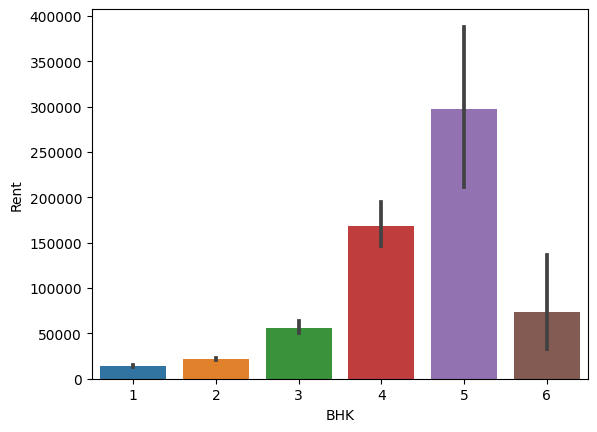

In [11]:
sns.barplot(data=data, x='BHK', y='Rent')

Here we can see that 4 and 5 BHK flats have higher rent than 6 BHK flats. One reason might be that 6 BHK flats are far away from the city.

<Axes: xlabel='BHK', ylabel='Rent'>

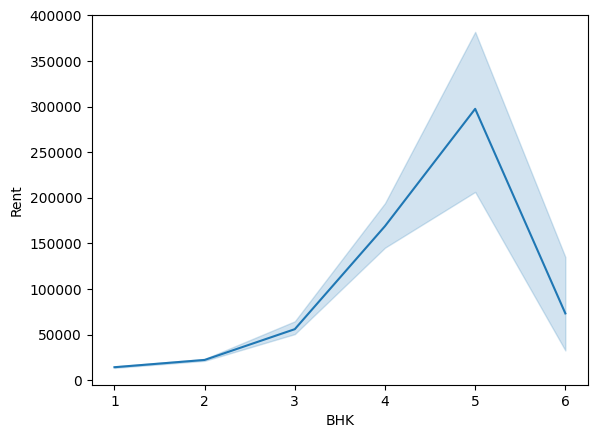

In [12]:
sns.lineplot(data=data, x='BHK', y='Rent')

We can see the increase in rent as the BHK increases and the peak of rent is at value 4 and then it starts to decrease.

<Axes: xlabel='BHK', ylabel='count'>

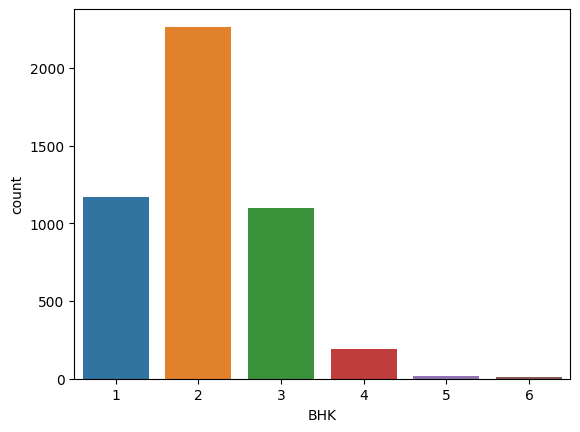

In [13]:
sns.countplot(data=data, x='BHK')

We can clearly see that 2 BHK flats which are rented the most. These flats might be budget friendly to the majority of the people.

In [14]:
labels = ['Chennai', 'Bangalore', 'Hyderabad', 'Mumbai', 'Delhi', 'Kolkata']
data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

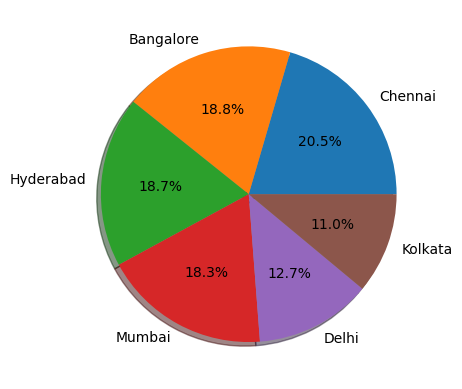

In [15]:
plt.pie(x=data['City'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True);

Bangalore has the highest availabilty of flats while Kolkata has the least.

<Axes: xlabel='Tenant Preferred', ylabel='count'>

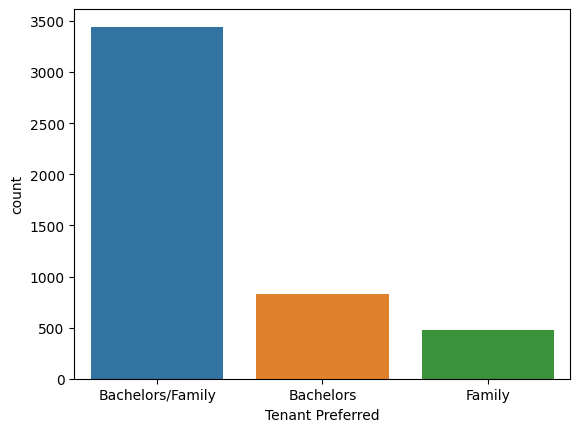

In [16]:
sns.countplot(data=data, x='Tenant Preferred')

Most of the people prefer both bachelors and family to rent out their respective flats. And less than 500 people consider only families as the tenant.

<Axes: xlabel='Rent'>

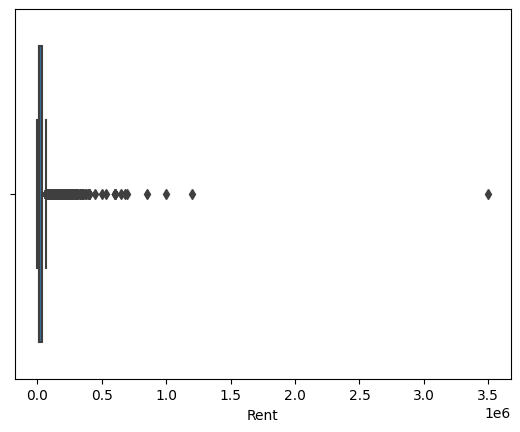

In [17]:
sns.boxplot(data=data, x='Rent')

We can see an outlier from the above boxplot. This is why boxplot is the best tool for outlier detection.

<Axes: xlabel='Rent'>

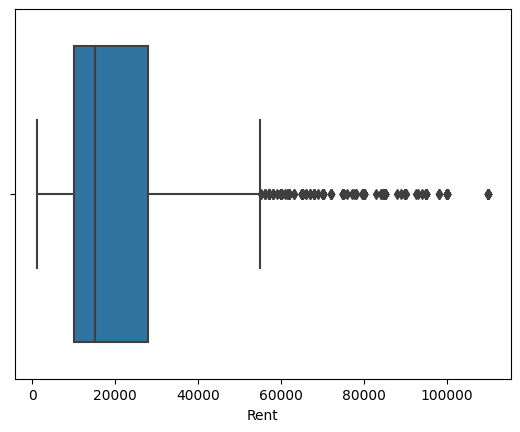

In [18]:
data.drop(data[data['Rent'] > 110000].index, inplace=True)
sns.boxplot(data=data, x="Rent")

Now we get a better picture of the boxplot after removing the outliers.

<Axes: xlabel='City', ylabel='Rent'>

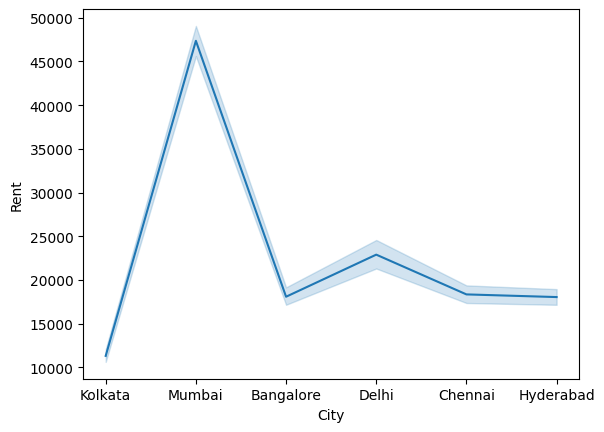

In [19]:
sns.lineplot(data=data, x='City', y="Rent")

Here we can see Mumbai is the most expensive while Kolkata is the cheapest of all.

Text(0.5, 1.0, 'Rent in different cities according to BHK')

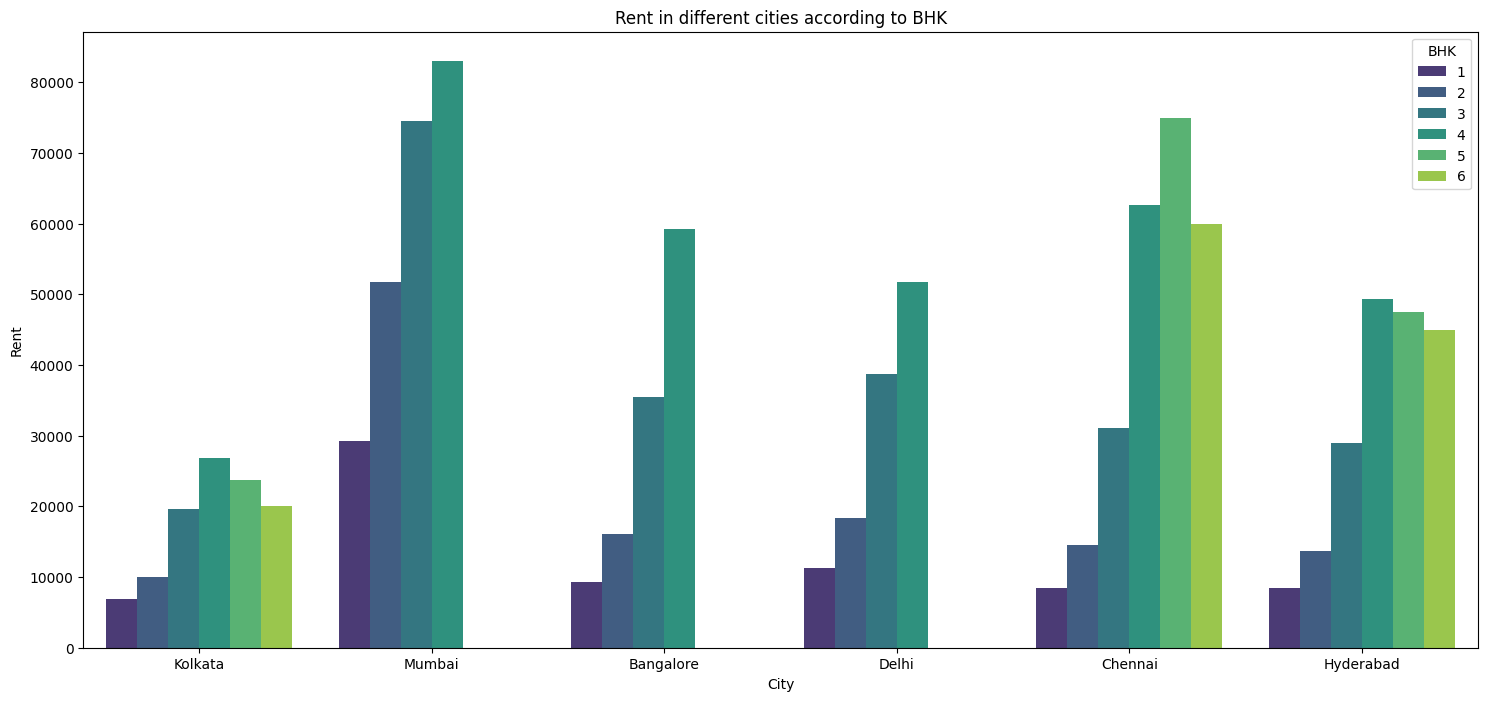

In [20]:
plt.figure(figsize=(18, 8))
sns.barplot(data=data, x='City', y='Rent', hue='BHK', errorbar=None, palette='viridis')
plt.title('Rent in different cities according to BHK')

<ipython-input-21-a01c05e887a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


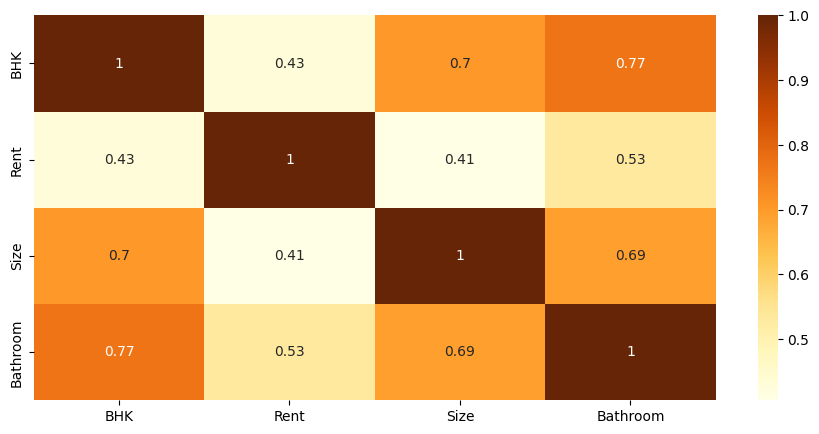

In [21]:
correlation = data.corr()
plt.figure(figsize = (11,5))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr');

We can see strong correlation between some of the features of the dataset

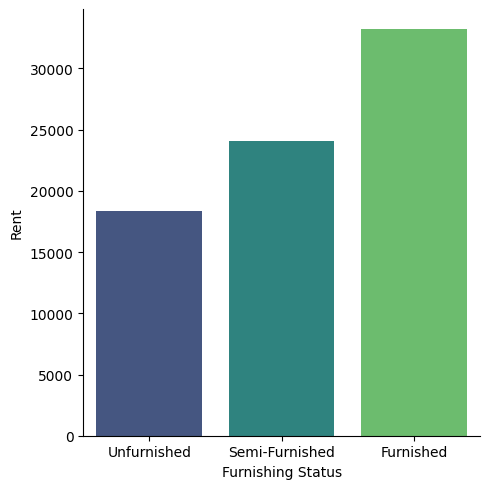

In [22]:
sns.catplot(data=data, x='Furnishing Status', y='Rent', kind='bar', palette='viridis', errorbar=None)

From this we can refer that furnished flats have higher rent.

<Axes: xlabel='Furnishing Status', ylabel='count'>

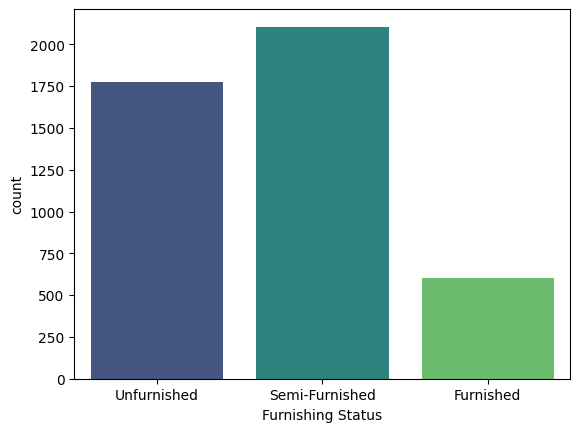

In [23]:
sns.countplot(data=data, x="Furnishing Status", palette='viridis')

People prefer semi-furnished flats more for rent.

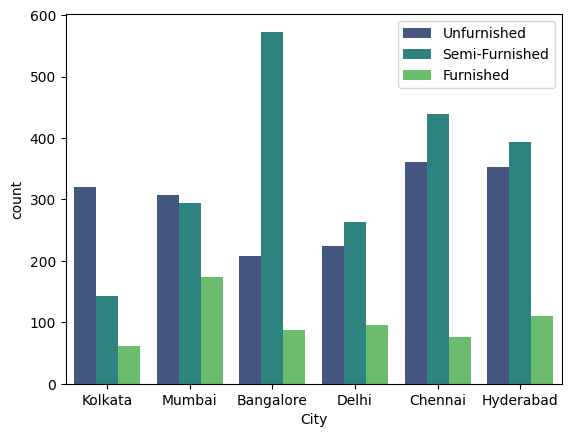

In [24]:
sns.countplot(data=data, x='City', hue='Furnishing Status', palette='viridis');
plt.legend(loc='best')

This plot shows that in all cities except Kolkata people prefer semi-furnished flats only. And among those who prefer furnished flats, its count is highest in Mumbai.

In [25]:
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


<Axes: xlabel='BHK', ylabel='Size'>

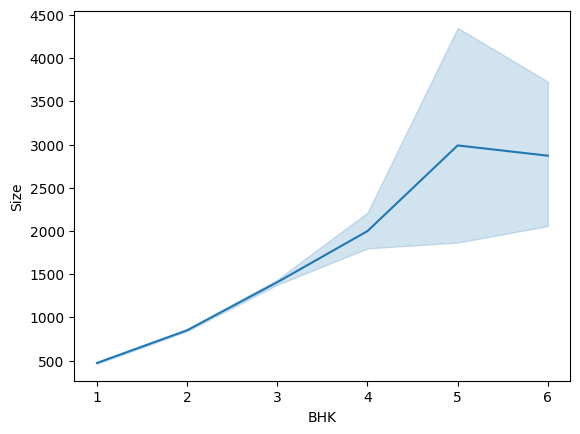

In [26]:
sns.lineplot(data=data, x='BHK',y='Size')

It's interesting to note that flats with 6 BHK has less size than flats with 5 BHK.   

<Axes: xlabel='Size'>

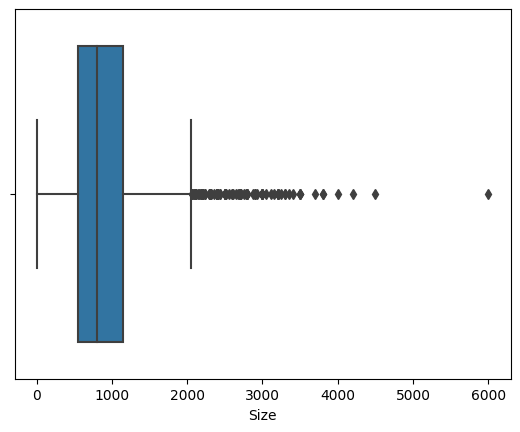

In [27]:
sns.boxplot(data=data, x='Size')

Clearly this boxplot shows that maximum number of flats have size around 1000. And we can see one outlier too which has to be taken care of.

<Axes: xlabel='Size'>

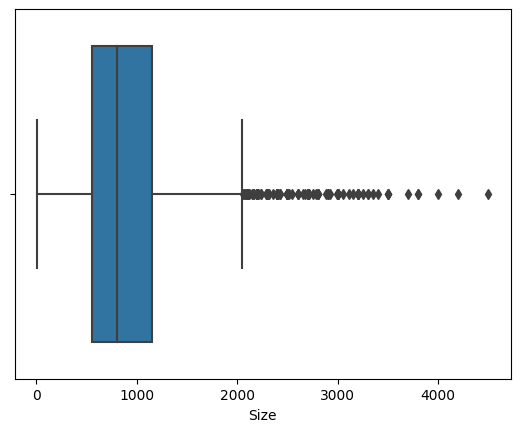

In [28]:
data.drop(data[data['Size'] > 5000].index, inplace=True)
sns.boxplot(data=data, x='Size')

<Axes: xlabel='Size', ylabel='Rent'>

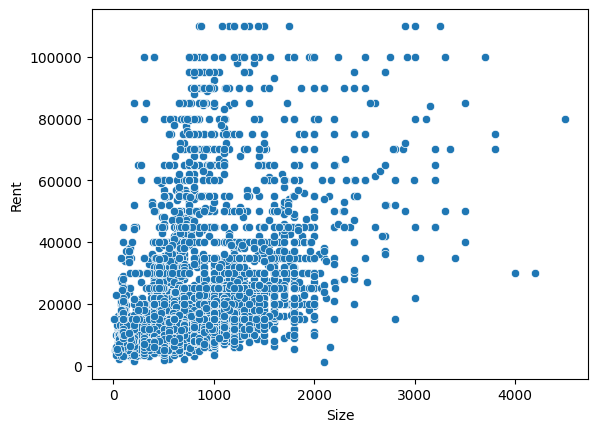

In [29]:
sns.scatterplot(data=data, x='Size', y='Rent')

We can see the dense concentration at the value 1000. And also we notice one fact that rent is not proportional to the size of the flat. It's distributed evenly.

# Building Models


In [30]:
data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


We need to preprocess the data to convert it into numeric features only.
We also need to scale some of the features so that our model is accurate.

In [31]:
data = data.drop('Area Locality', axis=1)
data.head()

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4480.0,2.004464,0.766267,1.0,1.0,2.0,2.0,6.0
Rent,4480.0,23015.383929,20490.120571,1200.0,10000.0,15000.0,28000.0,110000.0
Size,4480.0,899.873884,518.052227,10.0,550.0,800.0,1150.0,4500.0
Bathroom,4480.0,1.860714,0.752029,1.0,1.0,2.0,2.0,7.0


We can see the how the values of mean, standard deviation vary. We need to do feature scaling.

In [33]:
from sklearn.model_selection import train_test_split
X = data.drop('Rent', axis=1)
y = data['Rent']

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Area Type'] = le.fit_transform(X['Area Type'])
X['City'] = le.fit_transform(X['City'])
X['Furnishing Status'] = le.fit_transform(X['Furnishing Status'])
X['Tenant Preferred'] = le.fit_transform(X['Tenant Preferred'])
X['Point of Contact'] = le.fit_transform(X['Point of Contact'])
X.head()

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,0,2,4,2,1,2,2
1,2,800,1,2,4,1,1,1,2
2,2,1000,1,2,4,1,1,1,2
3,2,800,1,2,4,2,1,1,2
4,2,850,1,1,4,2,0,1,2


In [35]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X['Size'] = mm.fit_transform(X['Size'].to_frame())
X.head()

,BHK,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,0.242762,0,2,4,2,1,2,2
1,2,0.175947,1,2,4,1,1,1,2
2,2,0.220490,1,2,4,1,1,1,2
3,2,0.175947,1,2,4,2,1,1,2
4,2,0.187082,1,1,4,2,0,1,2


In [36]:
from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler()
y = mm_scale.fit_transform(y.values.reshape(-1, 1))

In [37]:
X.shape, y.shape

((4480, 9), (4480, 1))

In [38]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4480.0,2.004464,0.766267,1.0,1.000000,2.000000,2.000000,6.0
Size,4480.0,0.198190,0.115379,0.0,0.120267,0.175947,0.253898,1.0
Area Type,4480.0,1.537946,0.499508,0.0,1.000000,2.000000,2.000000,2.0
City,4480.0,2.360491,1.748077,0.0,1.000000,2.000000,4.000000,5.0
Furnishing Status,4480.0,1.261607,0.679722,0.0,1.000000,1.000000,2.000000,2.0
Tenant Preferred,4480.0,0.918304,0.511554,0.0,1.000000,1.000000,1.000000,2.0
Bathroom,4480.0,1.860714,0.752029,1.0,1.000000,2.000000,2.000000,7.0
Point of Contact,4480.0,1.427009,0.904225,0.0,0.000000,2.000000,2.000000,2.0


After preprocessing we see the values  of mean and standard deviation are scale down to the same level.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
lr_normal = LinearRegression()
lr_normal.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_normal_intercept = lr_normal.intercept_
lr_normal_intercept

array([0.1045224])

In [42]:
lr_normal_coef = lr_normal.coef_
lr_normal_coef

array([[ 0.01982681,  0.22006135,  0.00959205, -0.01031249,  0.01926065,
        -0.03606702, -0.00637881,  0.05568376, -0.06834245]])

In [43]:
lr_normal_train_score = lr_normal.score(X_train, y_train)
lr_normal_test_score = lr_normal.score(X_test, y_test)
print('Linear Regression Normal training score : ', lr_normal_train_score)
print('Linear Regression Normal test score : ', lr_normal_test_score)

Linear Regression Normal training score :  0.6001276559069418
Linear Regression Normal test score :  0.6376126689818973


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_train_pred = lr_normal.predict(X_train)
y_test_pred = lr_normal.predict(X_test)
lr_normal_train_mse = mean_absolute_error(y_train, y_train_pred)
lr_normal_test_mse = mean_absolute_error(y_test, y_test_pred)
print('Linear Regression Normal training MSE : ', lr_normal_train_mse)
print('Linear Regression Normal test MSE : ', lr_normal_test_mse)


Linear Regression Normal training MSE :  0.08202695210432917
Linear Regression Normal test MSE :  0.08248002632350457


We got 60% and 63% score in training and testing score respectively. This can be improved by testing other models.

## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=1.0)
lr_ridge.fit(X_train, y_train)

Ridge()

In [46]:
lr_ridge_train_score = lr_ridge.score(X_train, y_train)
lr_ridge_test_score = lr_ridge.score(X_test, y_test)
print('Ridge Regression training score : ', lr_ridge_train_score)
print('Ridge Regression test score : ', lr_ridge_test_score)

Ridge Regression training score :  0.6001113551337308
Ridge Regression test score :  0.6375836987908869


Not that much of difference betwwen ridge and normal Linear Regression.

## Polynomial Regression

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly_train.shape, X_poly_test.shape

((3584, 55), (896, 55))

In [48]:
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

LinearRegression()

In [49]:
lr_poly_train_score = lr_poly.score(X_poly_train, y_train)
lr_poly_test_score = lr_poly.score(X_poly_test, y_test)
print('Polynomial Regression training score :', lr_poly_train_score)
print('Polynomial Regression test score :', lr_poly_test_score)

Polynomial Regression training score : 0.7026433584191907
Polynomial Regression test score : 0.7261690047643085


This is a much better score, we can still apply other methods for more score.

## Decision Tree
But before training Decision Tree we will apply a `GridSearch` to find the best parameters to use by using `GridSearchCV`.

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
min_split = np.array([2, 3, 4, 5, 6, 7])
max_lvl = np.array([3, 4, 5, 6, 7, 9, 11])
algo = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
values_grid = {'min_samples_split': min_split, 'max_depth': max_lvl, 'criterion': algo}

In [51]:
model = DecisionTreeRegressor()
decision_tree_grid = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [52]:
decision_tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [53]:
print('Best split :', decision_tree_grid.best_estimator_.min_samples_split)
print('Best depth :', decision_tree_grid.best_estimator_.max_depth)
print('Best algo :', decision_tree_grid.best_estimator_.criterion)
print('Score :', decision_tree_grid.best_score_)

Best split : 7
Best depth : 6
Best algo : poisson
Score : 0.6966909612832787


In [54]:
decision_tree = DecisionTreeRegressor(min_samples_split = 4, max_depth = 6, criterion = 'poisson')

In [55]:
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, min_samples_split=4)

In [56]:
decision_tree_train_score = decision_tree.score(X_train, y_train)
decision_tree_test_score = decision_tree.score(X_test, y_test)
print('Decision Tree train score : ', decision_tree_train_score)
print('Decision Tree test score :', decision_tree_test_score)

Decision Tree train score :  0.7732424562404946
Decision Tree test score : 0.7505689929150822


In [57]:
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_mae =  mean_absolute_error(y_test, decision_tree_pred)
print('Decision Tree MSE : ', decision_tree_mse)
print('Decision Tree MAE : ', decision_tree_mae)

Decision Tree MSE :  0.009050662955204144
Decision Tree MAE :  0.06135376679413662


That's a great improvement in the score. Now we will train `RandomForestRegressor`.

## Random Forest


In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)

In [59]:
rf.fit(X_train, y_train)

<ipython-input-59-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor()

In [60]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Random Forest train score : ', rf_train_score)
print('Random Forest test score : ', rf_test_score)

Random Forest train score :  0.9583251998201643
Random Forest test score :  0.7726222018076166


`RandomForestRegressor` trained really well and it has the highest test score of all the models we trained.

# Conclusion
* We analysed the house rent dataset and were able to extract a lot of information from the dataset like which city is richest or cheapest.
* We detected `outliers` with the help of `boxplot` so that our analysis is accurate.
* With the help of `lineplots`, `barplots` and `scatterplots` we were able to identify many patterns and facts from the dataset.
* We preprocessed the data with the help of `sklearn` library by performing many methods like `feature scaling`, `feature transformation` and splitting data into `training` and `test` data.
* We trained multiple models which were `Linear Regression`, `Ridge Regression`, `Polynomial Regression`, `Decision Tree`, `Random Forest`.
* We also used `GridSearchCV` to find the best hyperparamters for decision tree model.
* `RandomForestRegressor` had the highest train and test score of `95.83%` and `77.26%` respectively.